In [ ]:
#
# ------------------------------------------------------------------------------------------------
#                             Best Model Selection - Best Xj Combination
# ------------------------------------------------------------------------------------------------
# 
# Step Wise 방법은 Pair Wise Combination 과 유사하게 독립변수들의 조합을 p-value, R² , AIC/BIC
# RMSE (Residual Mean Squared Error) 등의 평가 지표를 비교하여 탐색하며 Best Combination 을 찾는 방법이나 
# 다중 공선성의 이슈가 있는 독립변수들은 고려되지 않는 등의 이유로 최근에는 활용되지 않고 있음. 
# 
# full model 대비 p model 이 설명하지 못하는 정도를 의미하는 Mallow Cp Statisitics 를 활용하여
# 전체 변수 조합에 대해서 비교 평가를 하는 방법도 있는데  Step Wise 의 결과와 비교해보면 이유 파악 가능함 
# 
# 특정 독립변수의 추가가 필요한 것일까에 대한 답을 해당 변수만이 설명할 수 있는 정도를 시각화하여 구할 수 도 있음
#
# [1] Best model selection through step-wise exploration
# ☆ 끝까지 완료 못함 [2] Comparision with the Mallow Cp statisitics based exploration 
# ☆ 파이선에서 제공되는 것이 너무 없음 [3] Indepedent-power visualization for a variable 
#

# STEP -  1
 ▶ Previous Best Model AIC :  370.0795328152835  ,  set()
 - Comparision : 
   .  Sepal_Length ~  + Petal_Width  :  206.22145020306053
   .  Sepal_Length ~  + Sepal_Width  :  369.9916713254629
   .  Sepal_Length ~  + Petal_Length  :  158.04042318338384
 ▶ Current Best Model AIC :  158.04042318338384  ,  {'Petal_Length'}

# STEP -  2
 ▶ Previous Best Model AIC :  158.04042318338384  ,  {'Petal_Length'}
 - Comparision : 
   .  Sepal_Length ~ Petal_Length + Petal_Width  :  156.04681625816733
   .  Sepal_Length ~ Petal_Length + Sepal_Width  :  99.02549981959152
 ▶ Current Best Model AIC :  99.02549981959152  ,  {'Petal_Length', 'Sepal_Width'}

# STEP -  3
 ▶ Previous Best Model AIC :  99.02549981959152  ,  {'Petal_Length', 'Sepal_Width'}
 - Comparision : 
   .  Sepal_Length ~ Petal_Length + Sepal_Width + Petal_Width  :  82.64272058698862
 ▶ Current Best Model AIC :  82.64272058698862  ,  {'Petal_Length', 'Petal_Width', 'Sepal_Width'}

# STEP -  4
 ▶ Previous Best Model AIC :  8

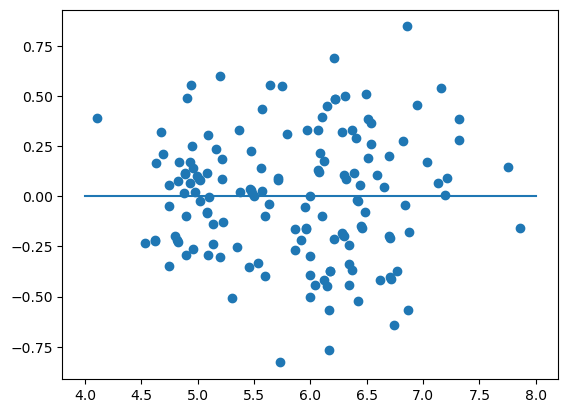

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


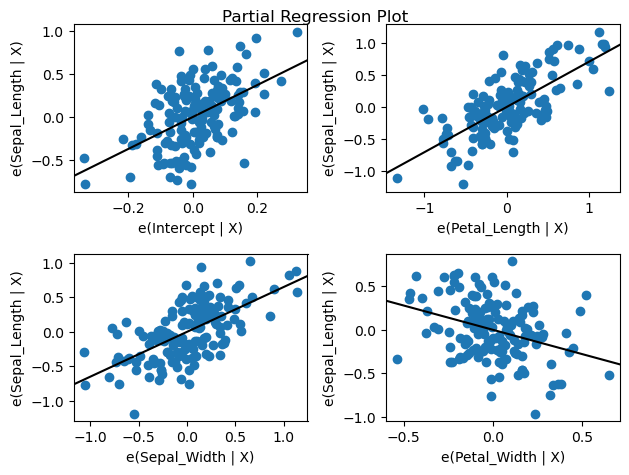

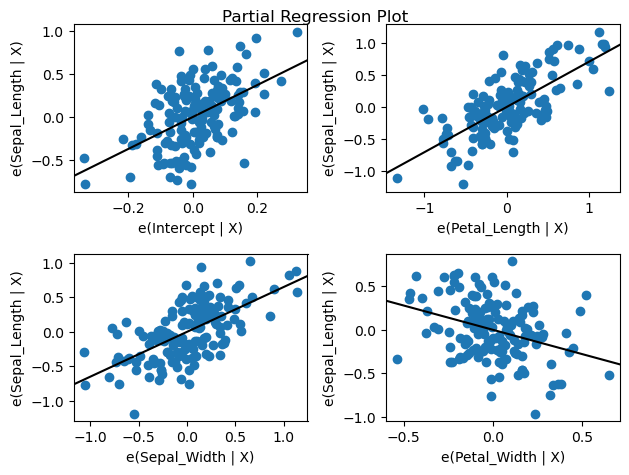

In [46]:
#
# [1] Best Model Selection Through Step-Wise Exploration
#

import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
import statsmodels.api as sm
import matplotlib.pyplot as plt

iris = pd.read_csv('./data/iris.csv')
iris.rename(columns=lambda x : x.replace('.','_'), inplace=True)
iris.head(4)

def find_best(top_model, remain_vars, data):
    print(' - Comparision : ')
    formula_base = 'Sepal_Length ~ ' + ' + '.join(used_vars)
    model_candidate = None
    x_candidate = None
    for var in remain_vars:
        formula = formula_base + ' + ' + var
        model = ols(formula=formula, data = data).fit()
        print('   . ' , formula , ' : ' , model.aic)
        if(model.aic < top_model.aic):
            model_candidate = model
            x_candidate = var
    return x_candidate, model_candidate

best_model = ols(formula='Sepal_Length ~ 1', data=iris).fit()
remain_vars = set(iris.columns.values)
remain_vars.remove('Sepal_Length')
remain_vars.remove('Species')
used_vars = set([])

step = 1
while True:
    print('# STEP - ', step)
    print(' ▶ Previous Best Model AIC : ', best_model.aic , " , " , used_vars)
    x_candidate, model_candidate = find_best(best_model,remain_vars, iris)
    if( (x_candidate == None) or (model_candidate == None) ):
           break
    best_model = model_candidate
    remain_vars.remove(x_candidate)
    used_vars.add(x_candidate)
    step = step + 1
    print(' ▶ Current Best Model AIC : ', best_model.aic , " , " , used_vars)
    print()

print("\n# Final Model : ", used_vars)
best_model.summary()

# 예측값 vs 잔차 산점도
# 무작위로 분포되어 있어야 오차의 독립성이 만족되는 것
y_pred = best_model.predict(iris.iloc[:, 1:-1])
residual = iris['Sepal_Length'] - y_pred
plt.scatter(y_pred, residual)
plt.plot(np.linspace(4, 8, 1000), np.zeros(1000))
plt.show()

#
# 독립변수 (절편 포함) 가 종속변수에 미치는 영향 시각화
# - x축 : 독립변수 값 , y축 : 다른 독립변수의 영향을 배제한 예측값
# - 
sm.graphics.plot_partregress_grid(best_model)
# 하나씩 보려면
# - sm.graphics.plot_regress_exog(best_model, 'Sepal_Width')
# - sm.graphics.plot_regress_exog(best_model, 'Petal_Width')
# - sm.graphics.plot_regress_exog(best_model, 'Petal_Length')


In [48]:
#
# [참고] Liklihood (우도, 가능도) & AIC / BIC 
#
# Liklihood 는 관측 데이터가 주어진 모수의 분포에서 관찰될 확률을 의미함
# 회귀 분석 모델은 주어진 데이터 적합되고 잔차의 평균과 표준편차가 계산됨
# 
# 회귀모델의 가정 중 하나는 잔차가 정규 분포를 따른다는 것이니
# 계산된 평균과 표준편차를 모수로 한 정규 분포가 있다고 할 때  
# 해당 모델에서 발생하는 잔차가 위 분포에서 관찰될 확률을 의미함
#
# 가정을 충실히 따라 잔차들이 이상적인(가정으로 인한) 분포를 잘 따르는지는
# 결국 해당 모델이 좋은 모델이라는 것을 의미함 
#
# AIC , BIC 는 우도, 독립변수 개수, 표본개수를 가지고 평가지표를 만든것
# - AIC = -2logL + 2p
# - BIC = -2logL + plogn  (p : 변수개수(절편포함) , n : 표본 개수, L : 우도)
#  

import pandas as pd
import numpy as np
import scipy.stats as sp
from statsmodels.formula.api import ols

iris = pd.read_csv('./data/iris.csv')
iris.rename(columns=lambda x:x.replace('.','_'), inplace=True)

formula = 'Sepal_Length ~ Petal_Width + Petal_Length + Sepal_Width'
model = ols(formula=formula, data=iris).fit()

y_hat = model.predict(iris[['Sepal_Width', 'Petal_Length','Petal_Width']])
y = iris['Sepal_Length']
residual = y - y_hat

# [NOTE] 회귀모델의 가정인 ε ~ N( 0,  σ² ) 을 이상적 분포로 본 것!  
dist = sp.norm(loc = 0, scale = np.std(residual, ddof=1))
liklihoods = dist.pdf(residual)
log_liklihood = np.sum(np.log(liklihoods))
print('# Log-Likelihood : ' , log_liklihood)  

AIC = -2 * log_liklihood + 2 * 4
BIC = -2 * log_liklihood + 4 * np.log(iris.shape[0])
print("# AIC , BIC : " , AIC , ' , ', BIC)

model.summary() 

# Log-Likelihood :  -37.32303440480403
# AIC , BIC :  82.64606880960805  ,  94.68860998599308


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Sepal_Length   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     295.5
Date:                Sat, 25 Mar 2023   Prob (F-statistic):           8.59e-62
Time:                        11:37:45   Log-Likelihood:                -37.321
No. Observations:                 150   AIC:                             82.64
Df Residuals:                     146   BIC:                             94.69
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.8560      0.251      7.401      0.000       1.360       2.352
Petal_Width     -0.5565      0.128     -4.363      0.000      -0.809      -0.304
Petal_Length     0.7091      0.057     12.502      0.000       0.597       0.821
Sepal_Width      0.6508      0.067      9.765      0.000       0.519       0.783
==============================================================================
Omnibus:                        0.345   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.842   Jarque-Bera (JB):                0.504
Skew:                           0.007   Prob(JB):                        0.777
Kurtosis:                       2.716   Cond. No.                         54.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
#
# NOTE: Cp 공식이 여기 저기 다름 !!!
#
# [2] Find Best Model with Mallow's Cp 
# - Cp = (MSE_partial - MSE_full) / MSE_full + p + 1 
#

import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
import itertools

iris = pd.read_csv('./data/iris.csv')
iris.rename(columns=lambda x: x.replace('.','_'), inplace=True)
iris = iris.iloc[:, :-1]

# CP 계산하기 
# - X : 전 독립변수의 데이터 ,  y : 종속변수 데이터
def mallows_cp(X, y, features):
    # full model
    formula = y.columns.values[0] + ' ~ ' + ' + '.join(X.columns.values)
    full_model = ols(formula=formula, data=pd.concat([y,X], axis=1)).fit()
    
    # parital model
    formula = y.columns.values[0] + ' ~ ' + ' + '.join(features)
    partial_model = ols(formula=formula, data = pd.concat([y, X], axis=1)).fit()

    # cp statistics
    n = len(X)
    p = len(features)

    cp = (partial_model.ssr - full_model.ssr) / full_model.mse_model - n * 2 * (p + 1)
    return cp

y = iris[[iris.columns[0]]]
X = iris.iloc[:, 1:]

# 독립 변수들의 가능한 모든 조합 만들기 
features_combination = []
for i in range(1, len(X.columns) + 1):
    combinbations = itertools.combinations(X.columns, i)
    for comb in combinbations:
        features_combination.append(comb)


# 모든 조합에 대해서 CP 계산하기
cp_values = []
for feature in features_combination:
    cp = mallows_cp(X,y,feature)
    cp_values.append(cp)
    print('- CP : ' , round(cp, ndigits=3) , ' by ', feature)

- CP :  -597.048  by  ('Sepal_Width',)
- CP :  -599.655  by  ('Petal_Length',)
- CP :  -599.338  by  ('Petal_Width',)
- CP :  -899.936  by  ('Sepal_Width', 'Petal_Length')
- CP :  -899.471  by  ('Sepal_Width', 'Petal_Width')
- CP :  -899.677  by  ('Petal_Length', 'Petal_Width')
- CP :  -1200.0  by  ('Sepal_Width', 'Petal_Length', 'Petal_Width')


In [ ]:
# [참고] ols().fit() 객체의 주요 통계적 속성
#  params: 회귀 계수 추정치 절편 및 기울기 값
#  conf_int(): 회귀 계수의 신뢰구간을 계산해주는 메서드
#  tvalues: 각 회귀 계수의 t-통계량
#  pvalues: 각 회귀 계수의 p-값
#  fittedvalues: 예측된 종속 변수 값
#  resid: 잔차
#  mse_resid: 잔차의 평균 제곱 오차
#  mse_model: 회귀 모델의 평균 제곱 오차
#  rsquared: 결정계수(R-squared)
#  rsquared_adj: 수정된 결정계수(Adjusted R-squared)
#  fvalue: F-통계량
#  f_pvalue: F-통계량의 p-값
#  aic: Akaike Information Criterion (AIC)
#  bic: Bayesian Information Criterion (BIC)
#  ssr: 잔차 제곱합(Residual Sum of Squares, RSS)
#  ess: 설명 제곱합(Explained Sum of Squares, ESS)
#  centered_tss: 총체 중심화 제곱합(Total Centered Sum of Squares)
#  scale: 회귀 모델의 표준 오차

In [ ]:
#
# ------------------------------------------------------------------------------------------------
#                               회귀 모델에서 영향점 (Influential Points)
# ------------------------------------------------------------------------------------------------
# 
# 회귀 모델 설정 時 영향력이 있는 표본을 영향점이라고 함
# 
# - 이상치(Outliers): 이상치는 종속 변수(y)에서 예측값과 크게 다른 관측치 →  예측 성능을 저하, 잔차의 분포를 왜곡
#                    이상치는 종속 변수의 값이 독립 변수와의 관계에서 벗어난 경우에 발생
# - Leverage Point : 독립 변수(x)의 값이 다른 관측치와 크게 다를 때 발생
#                    →  회귀선을 자신에게 끌어당기려는 경향 → 회귀선의 기울기와 절편에 큰 영향 可
# 
#
# 예측값 vs 잔차 산점도, 스튜던트 잔차, Cook Distance 등을 를 가지고 영향점을 식별
# 
# [1] Cook Distance
# - 회귀 계수 추정치에 관측치가 미치는 영향을 평가하는 척도
# - 일반적인 임계값은 4/n 또는 1 (n 은 데이터셋의 관측치 수)
# - Ci = ∑ ( y_hat_j - y_hat_j_(i) )² / p * MSE  ( from j = 1 to n  )  (* https://en.wikipedia.org/wiki/Cook%27s_distance)
#   - y_hat_j     : j 번째 관측치의 실제 종속변수 값
#   - y_hat_j_(i) : i 번째 관측치를 제외한 회귀 모델부터 예측된 j 번째 관측치의 종속변수 값
#
# [2] Studentized Residual
# - 내부 및 외부 스튜던트화 잔차는 각 관측치의 잔차를 표준화하여 이상치를 찾는 데 사용
# - 일반적으로 절대값이 2 이상인 스튜던트화 잔차를 가진 관측치는 주의를 기울여야 하며, 절대값이 3 이상인 경우 이상치로 간주
# 
# [3] Hat Matrix : y_hat 을 만들어내느 Matrix (* https://en.wikipedia.org/wiki/Cook%27s_distance)
# - 회귀계수를 예측에 적용하는 식에서 y_hat 과 y(표본)의 관계를 H 로 도출 
#   β = ( X_T · X )-¹ · X_T  ·  y
#   → y_hat = X · β =  X · ( X_T · X )-¹ · X_T  ·  y
#   → y_hat = H · y
#   . H is called as the hat matrix or projection matrix. The dialog element is the leverage of i-th observation
# - 즉, y_hat = H · y 의 H 가 y_hat 을 산출하는데 영향을 주는 Matrix 라고 볼 수 있음
# - 또한 H 는 X 로 구성된 Matrix 임. 일반적으로 대각 행렬의 값이 2 x (p + 1) / n 보다 
# - 큰 경우 leverage point 라고 보는 것
# 


Number of outliers:  2
Number of leverage points:  11


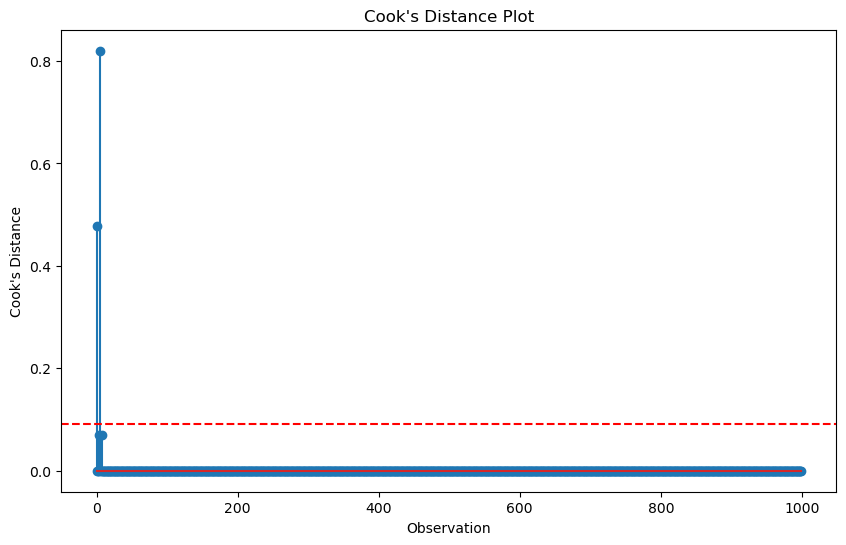

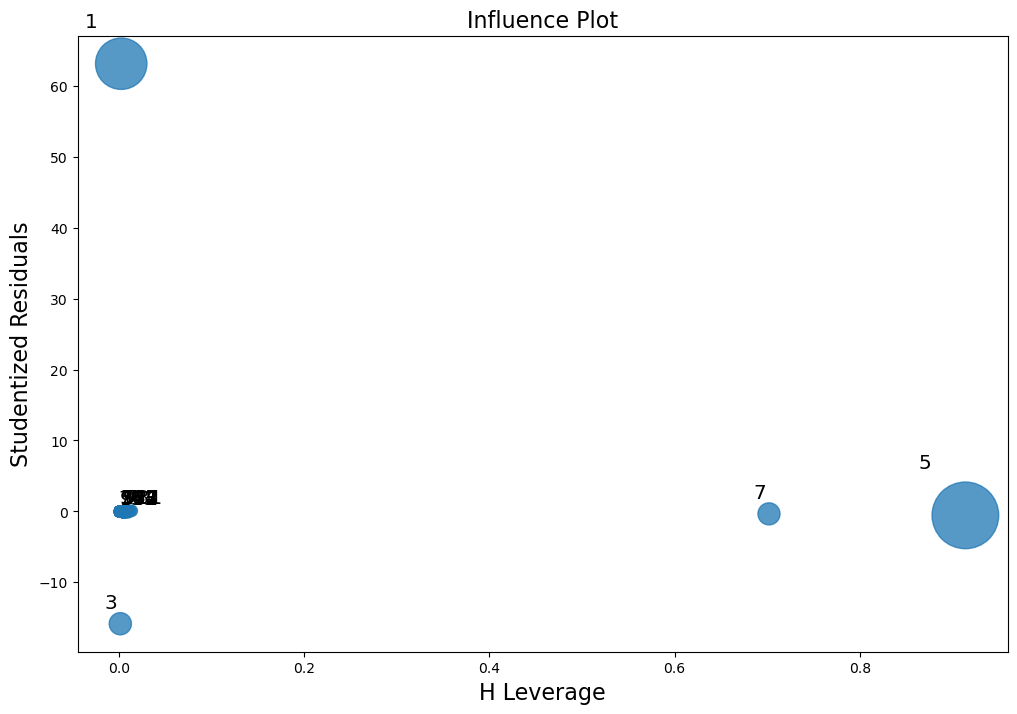


VIF table:
   VIF Factor features
0    2.406220       X1
1   17.039020       X2
2   15.296042       X3


In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Generate random data with 3 independent variables
n_samples = 1000
x1 = np.random.normal(size=n_samples)
x2 = np.random.normal(size=n_samples)
x3 = np.random.normal(size=n_samples)
y = 5*x1 + 3*x2 - 2*x3 + np.random.normal(size=n_samples)

# Add outliers to the data
y[1] = 1000000
y[3] = -500000

# Add high-leverage points to the data
x1[5] = 100
x2[7] = -50

# Add high correlations between independent variables
x1 = 0.9*x2 + np.sqrt(1-0.9**2)*x1
x3 = 0.9*x2 + np.sqrt(1-0.9**2)*x3

# Create a pandas dataframe with the data
data = pd.DataFrame({'X1': x1, 'X2': x2, 'X3': x3, 'Y': y})

# Standardize the independent variables
scaler = StandardScaler()
X = scaler.fit_transform(data.iloc[:, :-1])

# Fit a linear regression model
model = sm.OLS(y, sm.add_constant(X)).fit()

# 
# Calculate Cook's distance  
#
cd, _ = model.get_influence().cooks_distance

#
# Identify outliers
# 
outliers = cd > np.mean(cd) + 3 * np.std(cd)

#
# Identify leverage points
#   
lev = model.get_influence().hat_matrix_diag > 2 * (np.shape(X)[1]+1)/np.shape(X)[0]

# Print number of outliers and leverage points
print("\nNumber of outliers: ", np.sum(outliers))
print("Number of leverage points: ", np.sum(lev))

# Plot Cook's distance vs. observations
plt.figure(figsize=(10,6))
plt.stem(cd)
plt.title("Cook's Distance Plot")
plt.xlabel("Observation")
plt.ylabel("Cook's Distance")
plt.axhline(np.mean(cd) + 3 * np.std(cd), linestyle='--', color='r')
plt.show()

# Plot standardized residuals vs. leverage
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model, ax=ax, criterion="cooks")
plt.show()

# Calculate VIF for each independent variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif["features"] = data.columns[:-1]

# Print the VIF table
print("\nVIF table:")
print(vif)
